# EDA - Visualizacion de datos

# Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

Para renderizar entornos en notebook

In [2]:
pio.renderers.default = 'notebook'

# Cargar los datos

In [3]:
ruta = r"D:\UNIANDES\Carrera de Software\Titulacion\Seminario_Python\seminario_complexivo_demo-games\data\processed\games_clean.csv"

In [4]:
games_clean = pd.read_csv(ruta)

In [5]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   videogame_names  8296 non-null   object 
 1   platform         8296 non-null   object 
 2   year_of_release  8296 non-null   int64  
 3   genre            8296 non-null   object 
 4   na_sales         8296 non-null   float64
 5   eu_sales         8296 non-null   float64
 6   jp_sales         8296 non-null   float64
 7   other_sales      8296 non-null   float64
 8   critic_score     8296 non-null   float64
 9   user_score       8296 non-null   float64
 10  rating_esrb      8296 non-null   object 
 11  total_sales      8296 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 777.9+ KB


# Visualizaciones con pandas

Ventas por año

In [6]:
ventas_por_anio = (games_clean.groupby('year_of_release')['total_sales'].sum())

## Grafico de Lineas

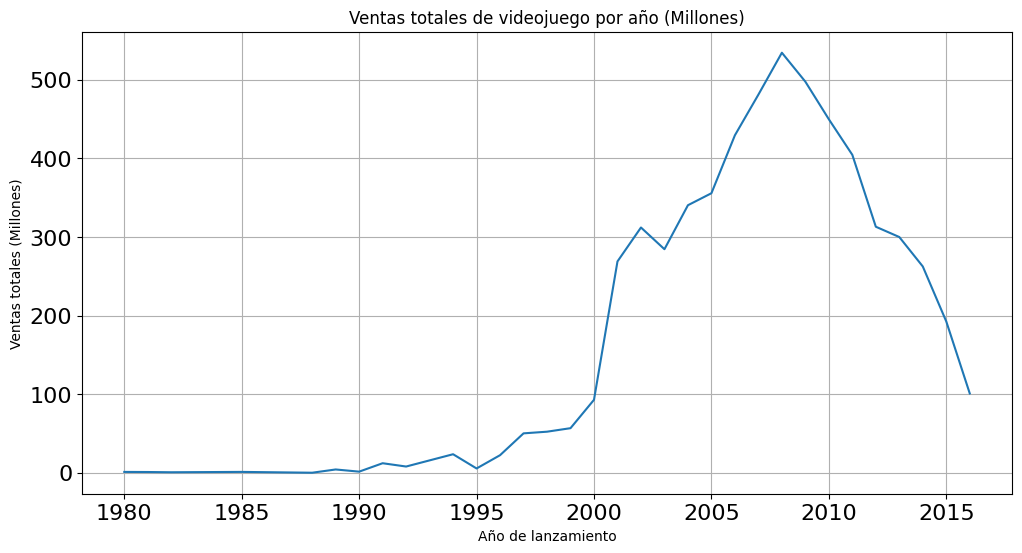

In [7]:
ventas_por_anio.plot(
    kind='line', 
    figsize = (12,6),
    title='Ventas totales de videojuego por año (Millones)',
    fontsize = 16,
    xlabel = "Año de lanzamiento",
    ylabel = "Ventas totales (Millones)"
    )
plt.grid(True)
plt.show()

## Grafico de Barras

In [8]:
ventas_por_genero = (games_clean.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
ventas_por_genero

genre
Action          1376.78
Sports           954.22
Shooter          849.37
Role-Playing     538.61
Racing           511.89
Misc             459.63
Platform         428.43
Fighting         268.28
Simulation       220.17
Adventure         96.30
Puzzle            84.32
Strategy          72.52
Name: total_sales, dtype: float64

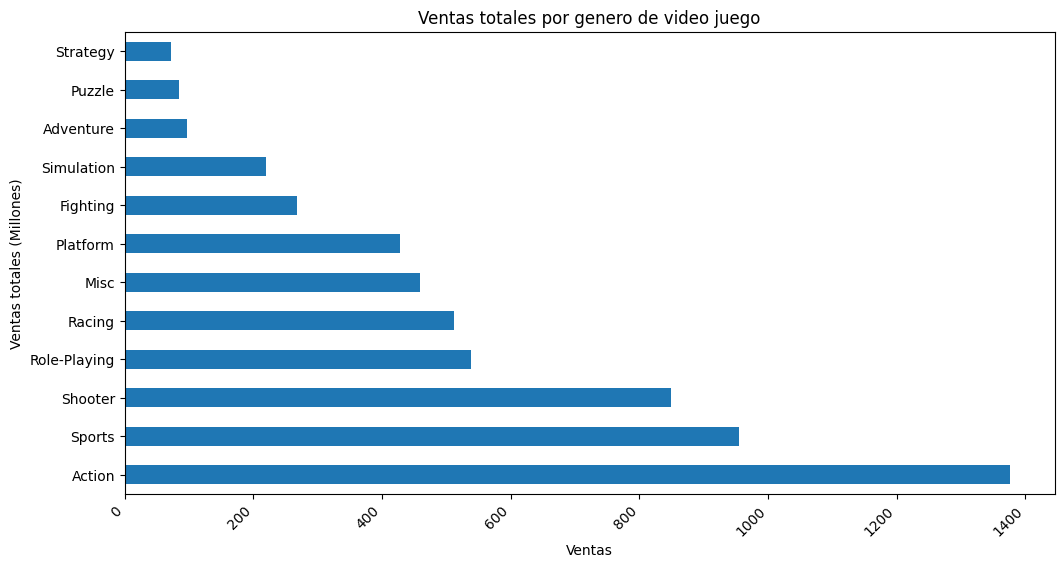

In [9]:
ventas_por_genero.plot(
    kind='barh', 
    figsize = (12,6),
    title='Ventas totales por genero de video juego',
    xlabel = "Ventas",
    ylabel = "Ventas totales (Millones)"
    )
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualizaciones con Matplotlib

In [10]:
ventas_por_anio

year_of_release
1980      1.05
1981      0.93
1982      0.62
1985      1.07
1988      0.03
1989      4.17
1990      1.40
1991     12.11
1992      7.91
1994     23.56
1995      5.45
1996     22.34
1997     50.13
1998     52.24
1999     56.72
2000     92.85
2001    268.92
2002    312.10
2003    284.46
2004    340.45
2005    355.71
2006    429.47
2007    481.19
2008    534.52
2009    497.67
2010    449.85
2011    404.55
2012    313.08
2013    299.97
2014    262.52
2015    192.56
2016    100.92
Name: total_sales, dtype: float64

In [11]:
año = ventas_por_anio.index

In [12]:
ventas = ventas_por_anio.values

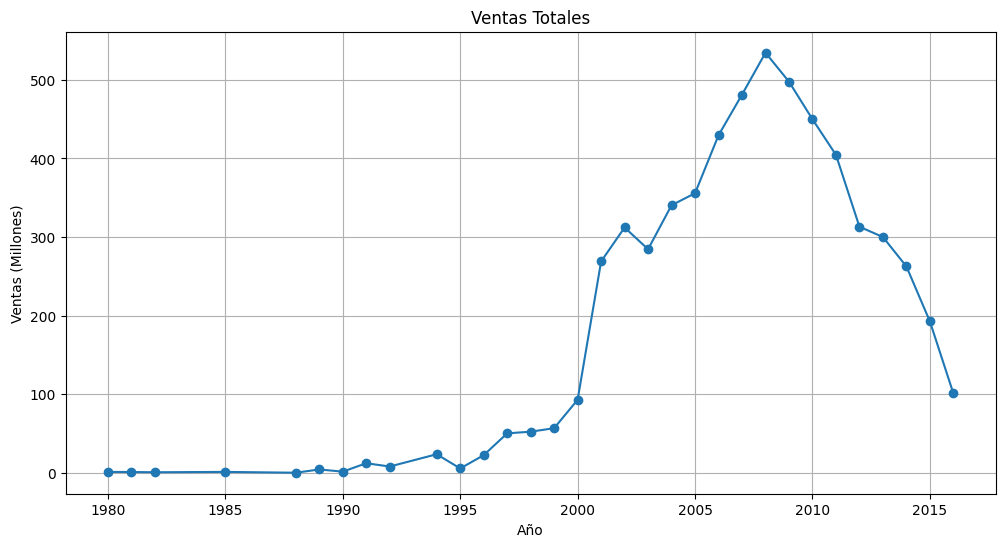

In [13]:
# tamaño de figura
plt.figure(figsize = (12, 6))

# grafico
plt.plot(año, ventas,  marker = 'o', linestyle = '-')

plt.title("Ventas Totales")
plt.xlabel("Año")

plt.ylabel("Ventas (Millones)")
plt.grid(True)

plt.show()

# Grafico de Dispercion

In [14]:
games_clean.head()

,videogame_names,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


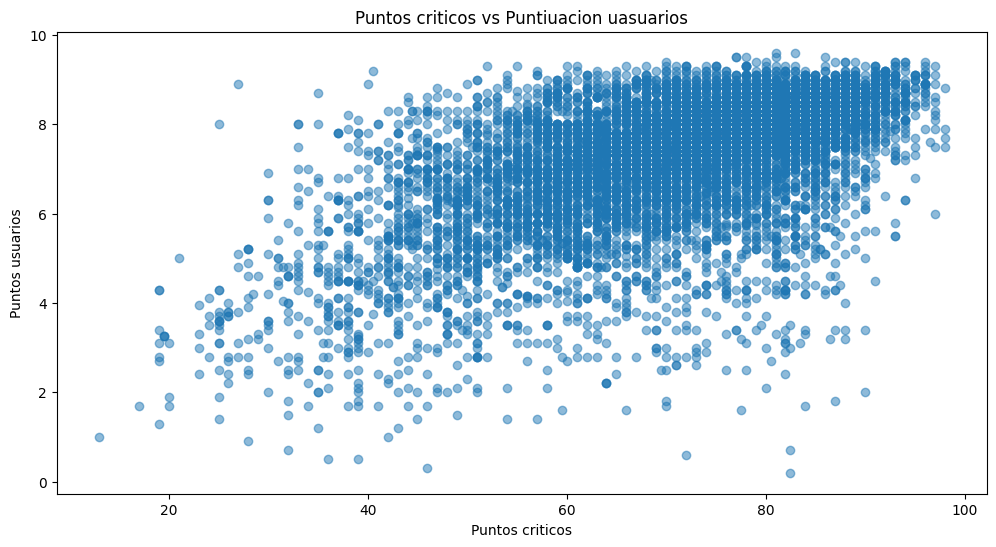

In [15]:
plt.figure(figsize = (12, 6))


plt.scatter(games_clean['critic_score'], games_clean['user_score'], alpha=0.5)

plt.title("Puntos criticos vs Puntiuacion uasuarios")

plt.xlabel("Puntos criticos")
plt.ylabel("Puntos usuarios")

plt.show()


In [16]:
print(games_clean["critic_score"].corr(games_clean["user_score"]))

0.5470304569826133


# Visualizacion coon Seaborn

# Histograma

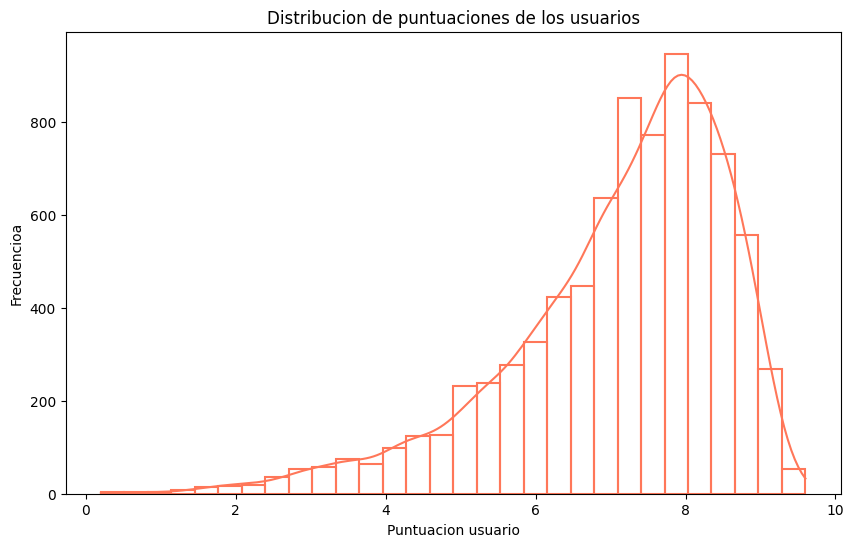

In [17]:
plt.figure(figsize=(10, 6))

sns.histplot (data = games_clean, x = "user_score", bins = 30, kde = True, fill = False, color = "#FF7759")

plt.title("Distribucion de puntuaciones de los usuarios")

plt.xlabel("Puntuacion usuario")
plt.ylabel("Frecuencioa")

plt.show()

In [18]:
games_clean["user_score"].describe()

count    8296.000000
mean        7.115423
std         1.470135
min         0.200000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.600000
Name: user_score, dtype: float64

# Diagrma de Caja y Bigote

In [19]:
games_clean.groupby("genre")["total_sales"].median().sort_values(ascending=False)

genre
Sports          0.32
Misc            0.31
Shooter         0.31
Fighting        0.31
Simulation      0.30
Platform        0.29
Action          0.28
Role-Playing    0.26
Racing          0.24
Puzzle          0.14
Adventure       0.13
Strategy        0.08
Name: total_sales, dtype: float64

In [20]:
order = games_clean.groupby("genre")["total_sales"].median().sort_values(ascending=False).index

In [21]:
order

Index(['Sports', 'Misc', 'Shooter', 'Fighting', 'Simulation', 'Platform',
       'Action', 'Role-Playing', 'Racing', 'Puzzle', 'Adventure', 'Strategy'],
      dtype='object', name='genre')

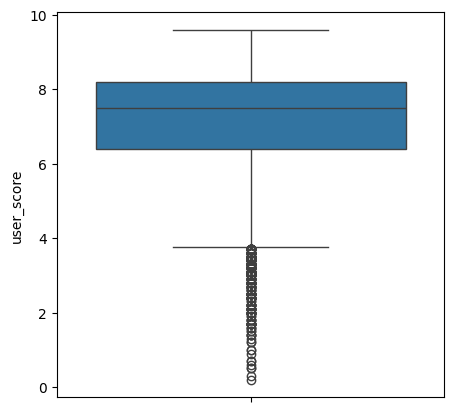

In [22]:
plt.figure(figsize = (5, 5))

sns.boxplot(data = games_clean, y = "user_score")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

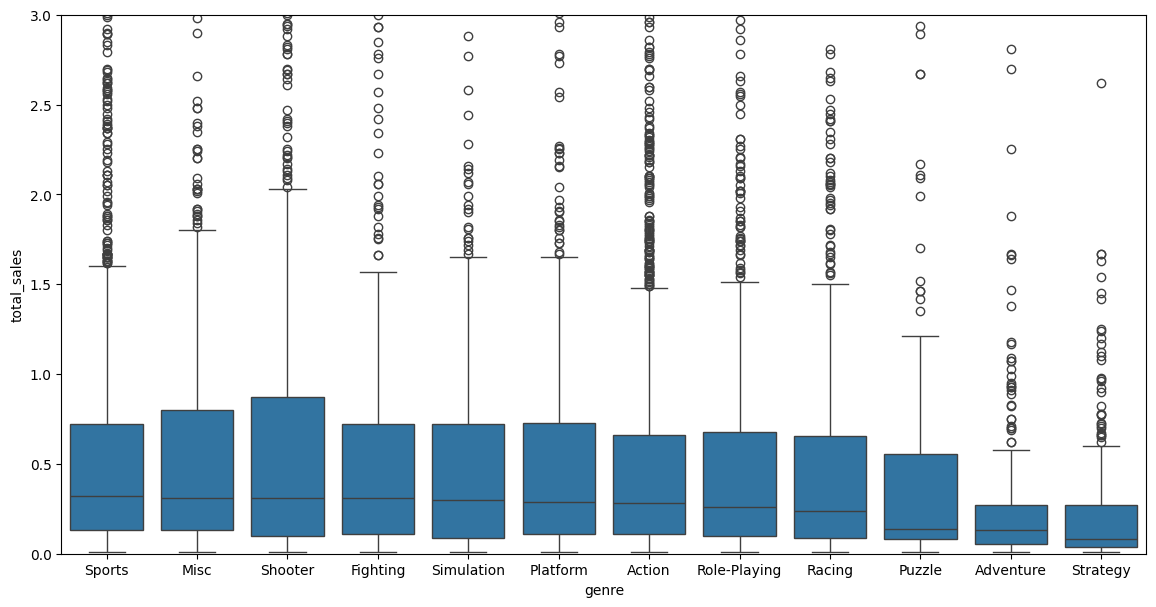

In [23]:
plt.figure(figsize = (14, 7))

sns.boxplot(data = games_clean, x = "genre", y = "total_sales", order = order)

plt.ylim(0,3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

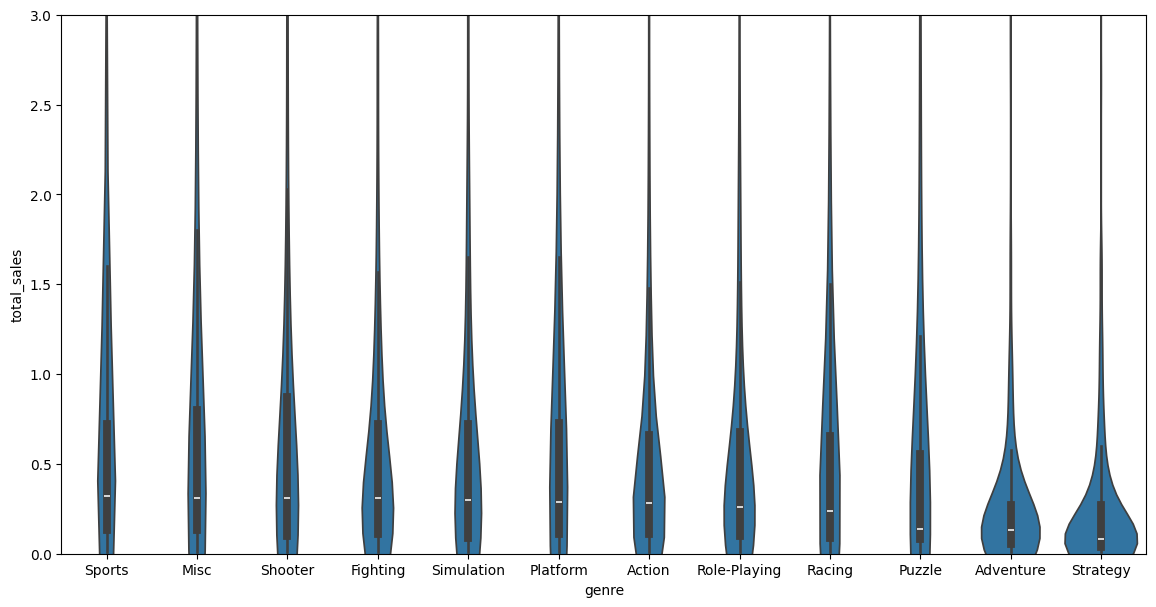

In [24]:
plt.figure(figsize = (14, 7))

sns.violinplot(data = games_clean, x = "genre", y = "total_sales", order = order)

plt.ylim(0,3)
plt.show

# Headmap

In [25]:
columnas_numericas = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']
matriz_correlacion = games_clean[columnas_numericas].corr()

In [26]:
matriz_correlacion

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.036952,0.027131,-0.063575,0.036430,0.004155,-0.246364,-0.013212
na_sales,-0.036952,1.000000,0.835362,0.459232,0.720807,0.226386,0.087483,0.954331
eu_sales,0.027131,0.835362,1.000000,0.503553,0.713591,0.209262,0.055572,0.936448
jp_sales,-0.063575,0.459232,0.503553,1.000000,0.381455,0.147226,0.130020,0.605127
other_sales,0.036430,0.720807,0.713591,0.381455,1.000000,0.188422,0.057141,0.800546
critic_score,0.004155,0.226386,0.209262,0.147226,0.188422,1.000000,0.547030,0.233046
user_score,-0.246364,0.087483,0.055572,0.130020,0.057141,0.547030,1.000000,0.089952
total_sales,-0.013212,0.954331,0.936448,0.605127,0.800546,0.233046,0.089952,1.000000


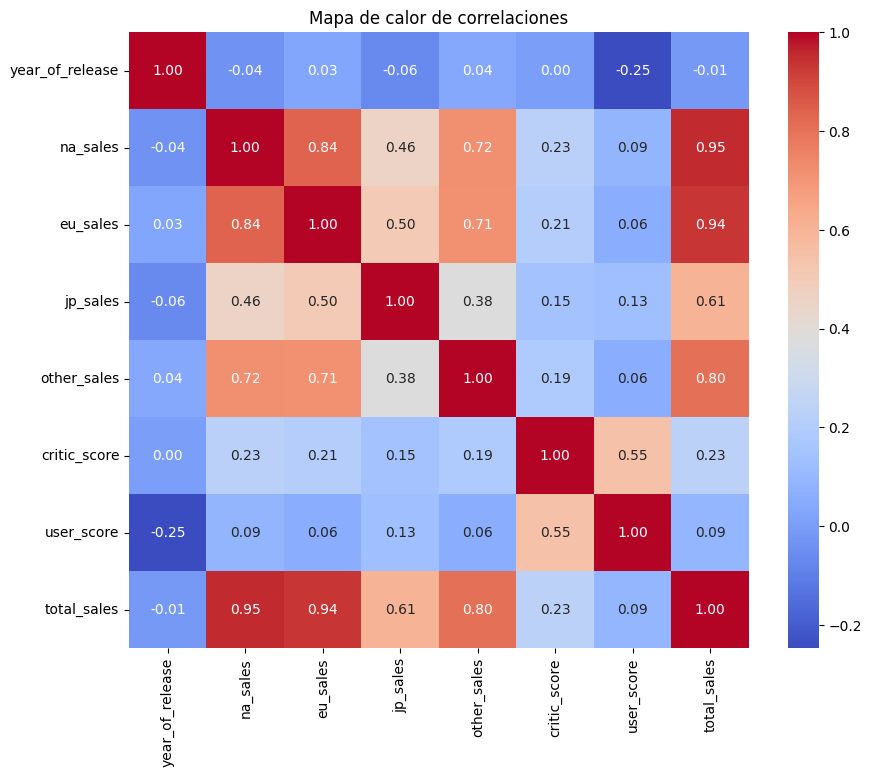

In [27]:
plt.figure(figsize = (10, 8))

sns.heatmap(matriz_correlacion, annot = True, cmap = "coolwarm", fmt =".2f")

plt.title("Mapa de calor de correlaciones")

plt.show()

# Gapminder con Plotly Express

In [28]:
# Se llama a los datos
gapminder = px.data.gapminder()
display(gapminder.head())
gapminder.info()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [30]:
# Grafico
fig = px.scatter(
    gapminder,
    x = "gdpPercap",
    y = "lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color = "continent",
    hover_name = "country",
    log_x =  "True",
    size_max = 55,
    title = "Evolucion del PIB per cápita y la Esperanza de Vida (1952-2007)"
)

# Mostrar
fig.show()

# Sunburst Chart

In [31]:
# filtramos el dataset para un solo año
gapminder_2007 = px.data.gapminder().query("year == 2007")

# creamos el sunburst
fig = px.sunburst(
    gapminder_2007,
    path=["continent", "country"],
    values="pop",
    color_continuous_scale = "Viridis",
    title="Distribución poblacional por continente y país (2907)"
)

# ajustar tamaño
fig.update_layout(
    width = 900,
    height = 700,
    title_font_size = 22
)

fig. update_traces(insidetextfont = dict (size = 14))

fig. show()

# Treemap

In [33]:
# treemap
fig = px.treemap(
    gapminder_2007,
    path=["continent", "country"],
    values = "pop",
    color = "lifeExp",
    color_continuous_scale = "Viridis",
    title="Treemap de población por continente y país (2007)"
)

# tamaño
fig.update_layout(
    width=900,
    height=650,
    margin = dict(t=50, l=25, r=25, b=25)
)

# mostrar
fig.show()

# Choropleth Maps

In [34]:
# filtrar datos para el año 2007
gapminder_2007 = px.data.gapminder().query("year == 2007")

#crear Choropleth Map
fig = px.choropleth(
    gapminder_2007,
    locations="iso_alpha",
    color = "lifeExp",
    hover_name = "country",
    color_continuous_scale = "Viridis",
    title="Esperanza de vida por país (2007)"
)

# tamaño
fig.update_layout(
    geo = dict(showframe = False)
)

# mostrar
fig.show()

# Visualizacion con Plotly Express

## Grafico de dispercion (Varios Graficos)

In [38]:
fig_facet = px.scatter(
    games_clean,
    x = "critic_score",
    y = "user_score",
    facet_col = "rating_esrb",
    title = "Critic Score vs User Score por clasificacion ESRB",
    facet_col_wrap = 3,
    color = "genre"
)

fig_facet.show()